# Modules

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data

In [256]:
burette = pd.read_csv( "burette.txt" )
pycnometer = pd.read_csv( "pycnometer.txt" )
volumetric_pipette = pd.read_csv( "volumetric-pipette.txt")

#volumetric pipette and pycnometer

m = 10.4 #g

#info
rho = 0.9986 #g/mnol
T = 18.1 #°C

In [257]:
burette

,V(mL),m(g)
0,5.0,5.02
1,10.0,9.96
2,15.0,14.92
3,20.0,19.95
4,25.0,24.94


In [258]:
pycnometer

,m-pycnometer(g),m-pycnometer-water(g),m-pycnometer-NaCl(g)
0,7.56,12.89,13.36
1,7.48,12.90,13.32
2,7.61,12.84,13.39
3,7.55,12.82,13.37
4,7.59,12.86,13.31


In [259]:
volumetric_pipette

,m_water(g)
0,10.04
1,10.07
2,10.06
3,10.05
4,10.02


# Burette

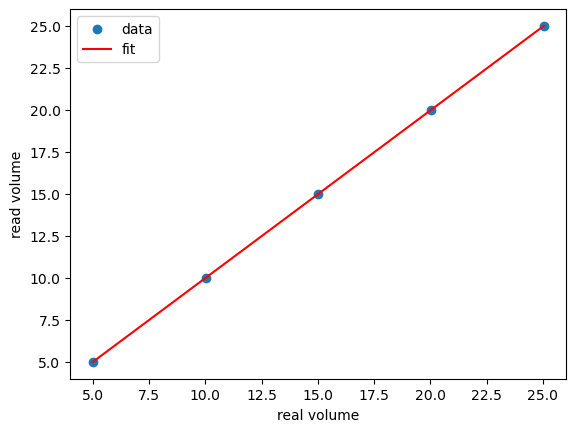

In [260]:
real_V = burette["V(mL)"]/rho
fig,ax = plt.subplots()
ax.scatter(   real_V , burette["V(mL)"] , label="data")
ax.set_xlabel("real volume" )
ax.set_ylabel("read volume" )

coeff , cov = np.polyfit(  real_V, burette["V(mL)"] , 1 , cov= True)
fit = np.poly1d(coeff)

ax.plot( real_V, fit(real_V), label="fit",color="red")

plt.legend()
plt.show()

In [261]:
m = round(  coeff[0] , 3 )
deltam = round( coeff[1] , 16 )
"El ajuste es Vread = ("+str(m)+" +- "+ str(deltam) +")mL^-1 Vreal (b is approximately 0)"


'El ajuste es Vread = (0.999 +- 4e-16)mL^-1 Vreal (b is approximately 0)'

# Volumetric pipette

In [262]:
v_water = volumetric_pipette["m_water(g)"]/rho
mean_v_water = v_water.mean().round(2)
std_v_water = round( v_water.std() , 2 )
"The volume of the volumetric pipette is ("+ str( mean_v_water )+" +- "+str(std_v_water )+" )mL"

'The volume of the volumetric pipette is (10.06 +- 0.02 )mL'

In [266]:
error = round( abs( (mean_v_water - 10)/10  )*100 , 1)
"The percentage error of the pipette volume (theoretical volume of 10mL) is "+str(error)+"%"

'The percentage error of the pipette volume (theoretical volume of 10mL) is 0.6%'

# Pycnometer

In [264]:
v_pycnometer = round( ( pycnometer["m-pycnometer-water(g)"] - pycnometer["m-pycnometer(g)"] ).mean() / rho , 2 )
std_v_pycnometer = round( ( pycnometer["m-pycnometer-water(g)"] - pycnometer["m-pycnometer(g)"] ).std() / rho , 2 )

"The volume of the pycnometer is ("+ str(v_pycnometer) +" +- "+str(std_v_pycnometer)+ ") mL"


'The volume of the pycnometer is (5.31 +- 0.07) mL'

# Density of solution of $NaCl$

In [265]:
rho_NaCl = round( pycnometer["m-pycnometer-NaCl(g)"].mean() / v_pycnometer , 2)
std_rho_NaCl = round(  pycnometer["m-pycnometer-NaCl(g)"].std() / v_pycnometer , 2  )
"The density of the solution of NaCl is ("+ str(rho_NaCl) +"+-"+str(std_rho_NaCl)+ ") g/mL"


'The density of the solution of NaCl is (2.51+-0.01) g/mL'